In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# CREDIT CARD CLUSTERING WITH K-MEANS AND PCA

## Background

The main target of this project is the practice and performance of yellowbriks visualization library, more precisely elbow method of kmeans, just because while i was doing my data science bootcamp I've never know which is the correct k for k means unless it is pretty clear, then when i red about this libraty i want to put in practice what a red.

Aside from that i put in practice the use of isolation forest to fight against outlier (thing that i have to improve) and finally use of PCA to make a 2d and 3d visualization with ploty express


### Dataset

The data consists on the info of almost 9000 clients of a credit card company, and its movements.

CUSTID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases (
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFFPURCHASES : Maximum purchase amount done in one-go
INSTALLMENTSPURCHASES : Amount of purchase done in installment
CASHADVANCE : Cash in advance given by the user
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
PURCHASESTRX : Numbe of purchase transactions made
CREDITLIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRCFULLPAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user

In [2]:
df=pd.read_csv('/Users/ismaelgarciainigo/Downloads/CC GENERAL.csv')
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

## EDA
Not so many Nans so i pick the mean for fill it

In [3]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [4]:
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean(),inplace=True)
df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mode()[0],inplace=True)

In [5]:
df.drop('CUST_ID',axis=1,inplace=True)

## Outliers problem
 
what i going to do is:
first, tranform data into Standard Scaler;second, use the isolation forest to remove the biggest outliers of the dataset
 
disclaimer, it wont be enough but if i keep on deleting more data i will have problems to use the k means model because 9000 rows are so few

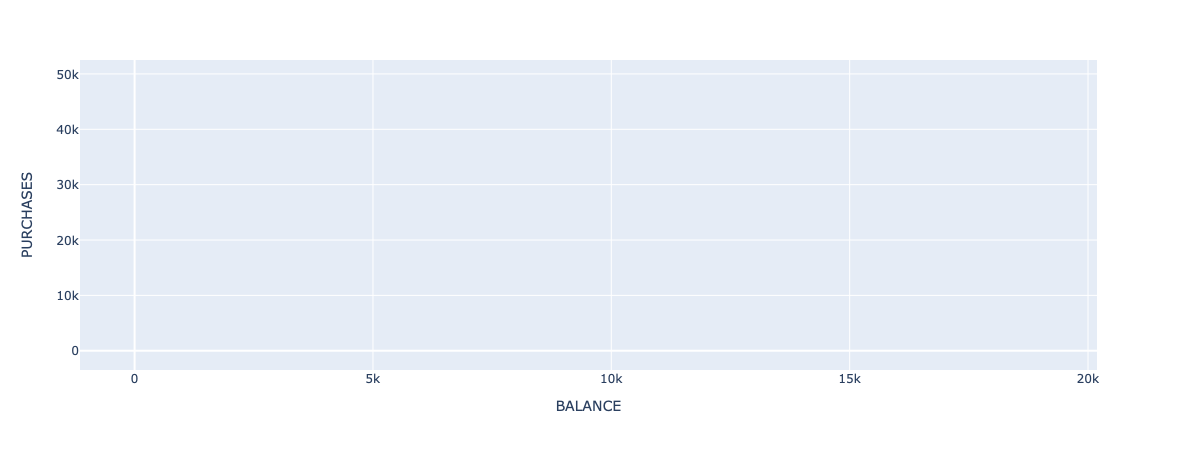

In [67]:
px.scatter(df,x='BALANCE',y='PURCHASES')

In [7]:
X=df.values

In [8]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8950, 17)

In [9]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest()#contamination=0.1
yhat = iso.fit_predict(X)
print(yhat)
mask = yhat != -1

X_train = X[mask, :]
X_train.shape

[ 1  1  1 ...  1  1 -1]


(8064, 17)

### Use the elbow visualizer for the elbow of kmeans

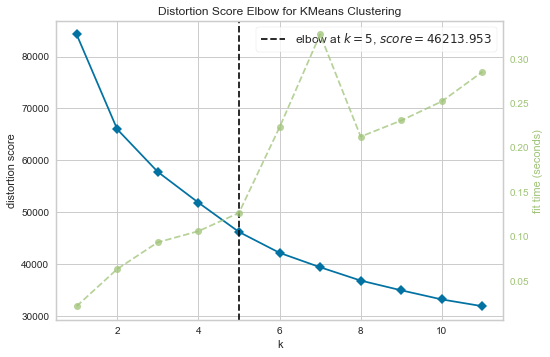

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(X_train) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

### Use Kmeans with k=5

In [11]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)
kmeans.labels_

array([2, 3, 0, ..., 4, 4, 2], dtype=int32)

In [12]:
from collections import Counter
Counter(kmeans.labels_)

Counter({2: 2553, 3: 1108, 0: 1193, 4: 2006, 1: 1204})

In [13]:
df_mask=pd.DataFrame(X_train,columns=df.columns)
df_mask

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.731989          -0.249434  -0.424900         -0.356934   
1     0.786961           0.134325  -0.469552         -0.356934   
2     0.447135           0.518084  -0.107668          0.108889   
3     0.049099          -1.016953   0.232058          0.546189   
4    -0.358775           0.518084  -0.462063         -0.347294   
...        ...                ...        ...               ...   
8059 -0.658640          -0.185477   0.004458          0.253220   
8060 -0.737950           0.518084  -0.333293         -0.356934   
8061 -0.742423           0.518084  -0.329136         -0.356934   
8062 -0.740398          -0.185477  -0.401965         -0.356934   
8063 -0.745174          -0.185477  -0.469552         -0.356934   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.349079     -0.466786            -0.806490   
1                  -0.454576      2.605605            -1.221758   
2                  -0.454576     -0.466786             1.269843   
3                  -0.454576     -0.368653            -1.014125   
4                  -0.454576     -0.466786            -1.014125   
...                      ...           ...                  ...   
8059               -0.454576     -0.466786            -0.391225   
8060               -0.132643     -0.466786             1.269843   
8061               -0.122823     -0.466786             1.269843   
8062               -0.294893     -0.466786             0.854576   
8063               -0.454576     -0.449352            -1.221758   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678661                         -0.707313   
1                      -0.678661                         -0.916995   
2                       2.673451                         -0.916995   
3                      -0.399319                         -0.916995   
4                      -0.399319                         -0.916995   
...                          ...                               ...   
8059                    0.438709                         -0.916995   
8060                   -0.678661                          1.179833   
8061                   -0.678661                          1.179833   
8062                   -0.678661                          0.760469   
8063                   -0.678661                         -0.916995   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675349         -0.476070      -0.511333     -0.960378   
1                   0.573963          0.110074      -0.591796      0.688678   
2                  -0.675349         -0.476070      -0.109020      0.826100   
3                  -0.258913         -0.329534      -0.551565      0.826100   
4                  -0.675349         -0.476070      -0.551565     -0.905410   
...                      ...               ...            ...           ...   
8059               -0.675349         -0.476070      -0.511333     -0.135850   
8060               -0.675349         -0.476070      -0.350408     -0.960378   
8061               -0.675349         -0.476070      -0.350408     -0.960378   
8062               -0.675349         -0.476070      -0.390639     -0.960378   
8063                0.157527         -0.182998      -0.591796     -1.097800   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.528979     -3.109675e-01         -0.525551  0.360680  
1     0.818642      8.931021e-02          0.234227  0.360680  
2    -0.383805     -1.016632e-01         -0.525551  0.360680  
3    -0.598688     -5.366135e-16         -0.525551  0.360680  
4    -0.364368     -2.657913e-01         -0.525551  0.360680  
...        ...               ...               ...       ...  
8059 -0.598688     -5.366135e-16         -0.525551 -4.122768  
8060 -0.486217     -3.498541e-01          1.183951 -4.122768  
8061 -0.503396     -5.366135e-16         -0.525551 -

### Adding the clusters results from kmeans to the dataframe

In [16]:
clusters=pd.concat([df_mask, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)
clusters.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.518084  -0.462063         -0.347294   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.349079     -0.466786            -0.806490   
1               -0.454576      2.605605            -1.221758   
2               -0.454576     -0.466786             1.269843   
3               -0.454576     -0.368653            -1.014125   
4               -0.454576     -0.466786            -1.014125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678661                         -0.707313   
1                   -0.678661                         -0.916995   
2                    2.673451                         -0.916995   
3                   -0.399319                         -0.916995   
4                   -0.399319                         -0.916995   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675349         -0.476070      -0.511333     -0.960378   
1                0.573963          0.110074      -0.591796      0.688678   
2               -0.675349         -0.476070      -0.109020      0.826100   
3               -0.258913         -0.329534      -0.551565      0.826100   
4               -0.675349         -0.476070      -0.551565     -0.905410   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT   TENURE  cluster  
0 -0.528979     -3.109675e-01         -0.525551  0.36068        2  
1  0.818642      8.931021e-02          0.234227  0.36068        3  
2 -0.383805     -1.016632e-01         -0.525551  0.36068        0  
3 -0.598688     -5.366135e-16         -0.525551  0.36068        2  
4 -0.364368     -2.657913e-01         -0.525551  0.36068        2

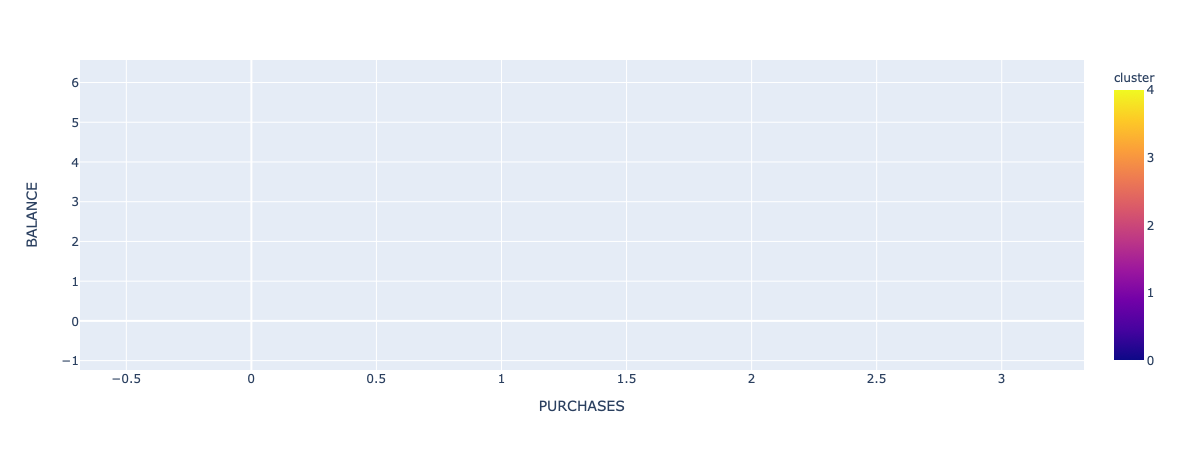

In [18]:
px.scatter(clusters,x='PURCHASES',y='BALANCE',color='cluster')

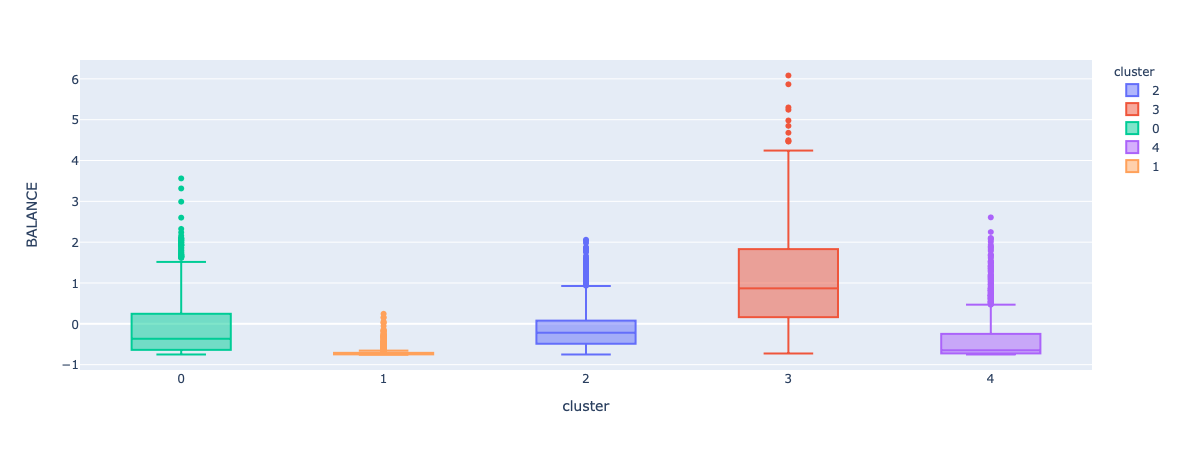

In [19]:
px.box(clusters,x='cluster',y='BALANCE',color='cluster')

## PCA
On this part of the code i'am going to use PCA just for the purpose of visualize what i took from the kmean. But first i will use the explained variance ratio to see in how many columns i can reduce the dataset (60% of variance results it is the best)

In [20]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([2.88607738e-01, 1.75948125e-01, 9.94527898e-02, 8.12311896e-02,
       7.91958901e-02, 6.77609488e-02, 5.58923649e-02, 4.63356645e-02,
       2.63591293e-02, 2.07411419e-02, 1.76913035e-02, 1.21799123e-02,
       9.50414550e-03, 9.03120863e-03, 6.83509950e-03, 3.23263419e-03,
       7.15293587e-07])

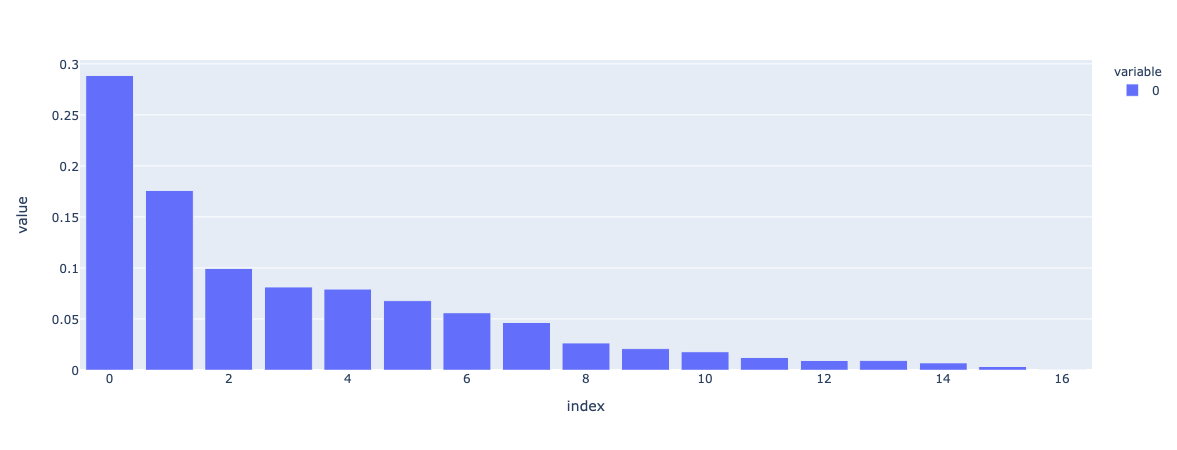

In [21]:
px.bar(pca.explained_variance_ratio_)

## PCA in 2 components for the kmeans outcome visualization

In [22]:
pca = PCA(n_components=2)
X_pca= pca.fit_transform(X_train)



In [24]:
kmeans1 = KMeans(n_clusters=5)
kmeans1.fit(X_pca)
kmeans1.labels_

array([3, 2, 0, ..., 1, 3, 3], dtype=int32)

In [25]:
Counter(kmeans.labels_)

Counter({2: 2553, 3: 1108, 0: 1193, 4: 2006, 1: 1204})

In [26]:
pca_df=pd.DataFrame(X_pca)
pca_df

0         1
0    -0.716443 -1.432319
1    -2.303181  1.191104
2     1.119398  1.348296
3    -1.069691 -0.536934
4    -0.909840 -0.833570
...        ...       ...
8059 -0.519332 -1.331137
8060  1.549538 -1.422401
8061  1.093594 -1.088727
8062  0.817723 -1.792212
8063 -1.472653 -2.069645

[8064 rows x 2 columns]

In [27]:
clusters1=pd.concat([pca_df, pd.DataFrame({'cluster':kmeans1.labels_})], axis=1)
clusters1.head()

0         1  cluster
0 -0.716443 -1.432319        3
1 -2.303181  1.191104        2
2  1.119398  1.348296        0
3 -1.069691 -0.536934        4
4 -0.909840 -0.833570        4

# kmeans 2d visualization

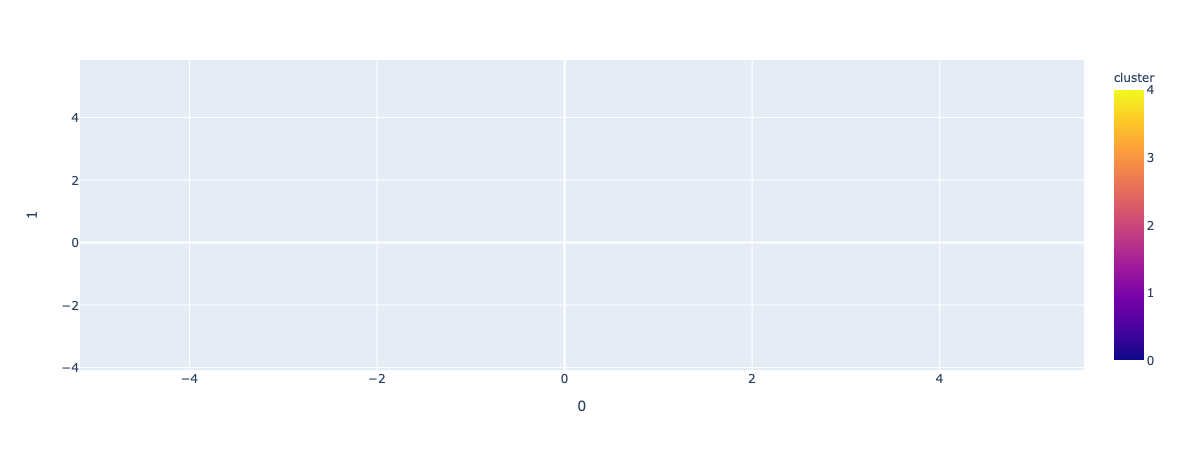

In [33]:
px.scatter(clusters1,x=0,y=1,color='cluster')

##  PCA in 3 components for the kmeans outcome visualization

In [60]:
pca1 = PCA(n_components=3)
X_pca1= pca1.fit_transform(X_train)

In [61]:
kmeans3d = KMeans(n_clusters=5)
kmeans3d.fit(X_pca1)
kmeans3d.labels_

array([4, 2, 3, ..., 1, 1, 0], dtype=int32)

In [62]:
Counter(kmeans3d.labels_)

Counter({4: 1226, 2: 1051, 3: 1297, 0: 2499, 1: 1991})

In [63]:
pca_df_3d=pd.DataFrame(X_pca1)
pca_df_3d

0         1         2
0    -0.716442 -1.432319 -0.035667
1    -2.303180  1.191104  0.498615
2     1.119398  1.348296  2.089158
3    -1.069691 -0.536937  1.386213
4    -0.909840 -0.833570  0.036489
...        ...       ...       ...
8059 -0.519332 -1.331138 -0.454604
8060  1.549537 -1.422401 -2.706913
8061  1.093594 -1.088728 -2.917542
8062  0.817723 -1.792212 -2.331361
8063 -1.472653 -2.069644 -1.554922

[8064 rows x 3 columns]

In [65]:
clusters3d=pd.concat([pca_df_3d, pd.DataFrame({'cluster':kmeans3d.labels_})], axis=1)
clusters3d.head()

0         1         2  cluster
0 -0.716442 -1.432319 -0.035667        4
1 -2.303180  1.191104  0.498615        2
2  1.119398  1.348296  2.089158        3
3 -1.069691 -0.536937  1.386213        0
4 -0.909840 -0.833570  0.036489        0

# kmeans 3d visualization

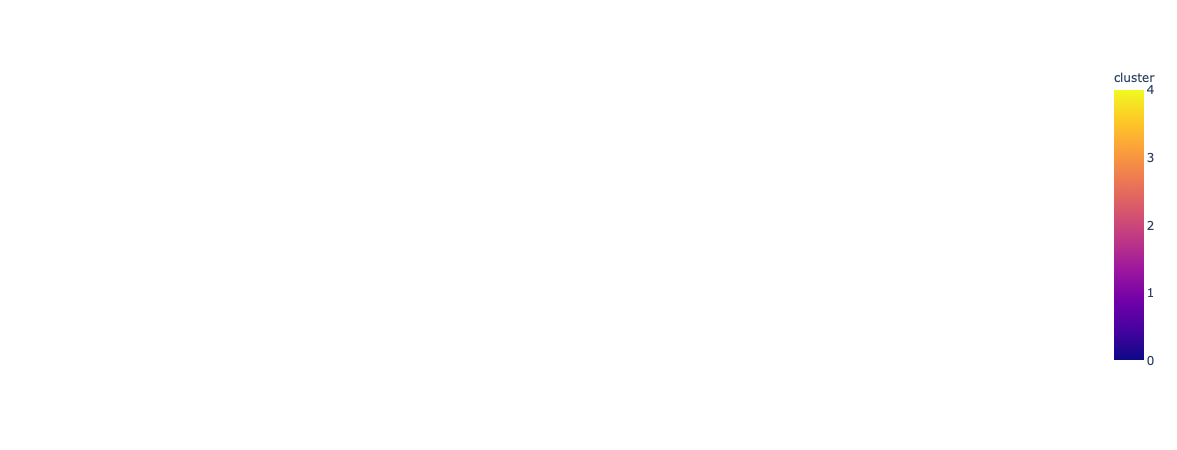

In [66]:
fig = px.scatter_3d(clusters3d, x=0, y=1, z=2,
              color='cluster')
fig.show()